In [1]:
# KNN REGRESSION (w/ PIPES!)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error
    , r2_score)

In [3]:
# Load the California housing dataset from sklearn
california = fetch_california_housing(
    as_frame=True)
df = california.frame

# Show the first few rows of the data
df.shape
df.head()
df.info()

(20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Check for missing values in the dataset
df.isnull().sum()

# Display summary statistics for the features
df.describe()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X.shape, y.shape

((20640, 8), (20640,))

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 
    , random_state=27
)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Define pipeline steps
pipe = Pipeline([
    ('scaler', StandardScaler())
    , ('knn_reg', KNeighborsRegressor())
])


In [10]:
from sklearn.model_selection import GridSearchCV

# Build the grid CV  
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] # Using odd numbers to avoid 'ties'

# Parameter grid for n_neighbors
# For pipeline hyperparameters, use 'model__param' format;
param_grid = {'knn_reg__n_neighbors': k_values
              , 'knn_reg__weights': ['uniform', 'distance'] # distance will likely win;
             }

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe
    , param_grid=param_grid
    , cv=5
    , scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_reg', KNeighborsRegressor())]),
             param_grid={'knn_reg__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'knn_reg__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [11]:
# Best hyperparameters
grid_search.best_params_

{'knn_reg__n_neighbors': 11, 'knn_reg__weights': 'distance'}

In [12]:
# Retrieve the best estimator from grid search
best_knn = grid_search.best_estimator_

# Predict on the test set with the best model
# Remember: since we used pipes, we don't have a separate scaled X_test;
y_pred_best = best_knn.predict(X_test)

In [13]:
grid_search.best_params_['knn_reg__n_neighbors']

11

In [14]:
# Metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"K-Value Best(CV): {grid_search.best_params_['knn_reg__n_neighbors']}, \nMSE Best: {mse_best}, \nRMSE Best: {rmse_best}, \nMAE Best: {mae_best}, \nR2 Best: {r2_best}")

K-Value Best(CV): 11, 
MSE Best: 0.4108474066144371, 
RMSE Best: 0.6409737955754798, 
MAE Best: 0.43659762289647747, 
R2 Best: 0.6884040601634612


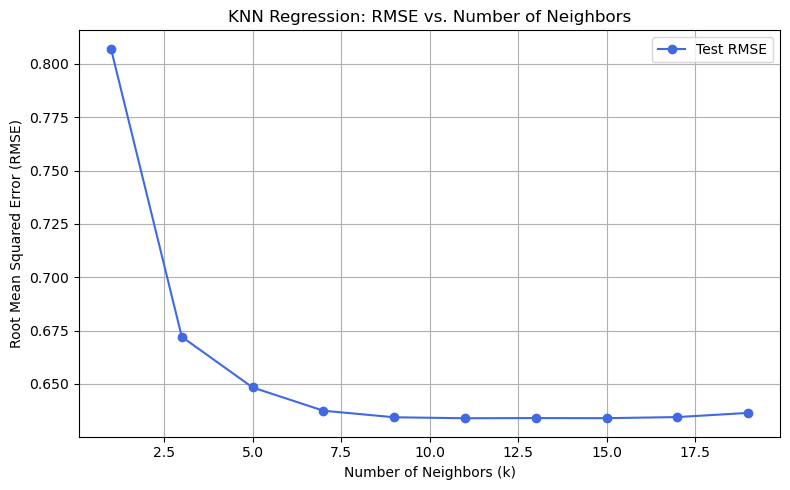

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get all parameter combinations and scores from grid search
results = pd.DataFrame(grid_search.cv_results_)

# Group by 'param_n_neighbors' and take the best (max) mean_test_score for each k
# Since scores are negative MSE, higher (closer to 0) is better
k_values = param_grid['knn_reg__n_neighbors']
best_scores_per_k = []

for k in k_values:
    # Filter results for current k
    scores_k = results[results['param_knn_reg__n_neighbors'] == k]['mean_test_score']
    # Take the best score (max, since less negative is better)
    best_scores_per_k.append(scores_k.max())

# Convert negative MSE to RMSE (since MSE is negative, take -score then sqrt)
rmse_per_k = [np.sqrt(-score) for score in best_scores_per_k]

plt.figure(figsize=(8, 5))
plt.plot(
      k_values
    , rmse_per_k
    , marker='o'
    , color='royalblue'
    , label='Test RMSE'
)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('KNN Regression: RMSE vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [16]:
# Temporarily suppress duplicate outputs (have to do this w/ px otherwise, it will output dupe charts!)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

In [21]:
# And now with plotly!

import plotly.express as px

# Get all parameter combinations and scores from grid search
results = pd.DataFrame(grid_search.cv_results_)

# Group by 'param_n_neighbors' and take the best (max) mean_test_score for each k
# Since scores are negative MSE, higher (closer to 0) is better
k_values = param_grid['knn_reg__n_neighbors']
best_scores_per_k = []

for k in k_values:
    # Filter results for current k
    scores_k = results[results['param_knn_reg__n_neighbors'] == k]['mean_test_score']
    # Take the best score (max, since less negative is better)
    best_scores_per_k.append(scores_k.max())

# Convert negative MSE to RMSE (since MSE is negative, take -score then sqrt)
rmse_per_k = [np.sqrt(-score) for score in best_scores_per_k]

# Create a DataFrame for Plotly Express
data = pd.DataFrame({
    "Number of Neighbors (k)": k_values
    , "Root Mean Squared Error (RMSE)": rmse_per_k
})

# Create the line plot
fig = px.line(
    data
    , x="Number of Neighbors (k)"
    , y="Root Mean Squared Error (RMSE)"
    , markers=True
    , title="KNN Regression: RMSE vs. Number of Neighbors"
)

# Customize layout (optional)
fig.update_traces(line=dict(color="royalblue"))
fig.update_layout(
    xaxis_title="Number of Neighbors (k)"
    , yaxis_title="Root Mean Squared Error (RMSE)"
    , template="plotly_white"
)

# Show the plot
fig.show()

In [17]:
# Extract results as a DataFrame for easy sorting and display
results = pd.DataFrame(grid_search.cv_results_)

# Compute RMSE from negative mean squared error
results['RMSE'] = np.sqrt(-results['mean_test_score'])

# Select relevant columns for display
display_cols = [
      'param_knn_reg__n_neighbors'
    , 'param_knn_reg__weights'
    , 'RMSE'
]

# Sort by RMSE ascending (lowest errors first)
top5 = results[display_cols].sort_values('RMSE').head(5)

# Rename columns for clarity
top5 = top5.rename(columns={
      'param_knn_reg__n_neighbors': 'Neighbors'
    , 'param_knn_reg__weights': 'Weights'
})

# Display the top 5 parameter sets with lowest RMSE
top5.reset_index(drop=True)

,Neighbors,Weights,RMSE
0,11,distance,0.633912
1,15,distance,0.633948
2,13,distance,0.633997
3,9,distance,0.634372
4,17,distance,0.634464


In [ ]:
"""
{'knn_reg__n_neighbors': 11,
'knn_reg__weights': 'distance'}
"""

In [18]:
# Create pipeline with k=9 (although, k=11 is quite good, this is just for shytes-n-giggles...)
pipe_elbow = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(
        n_neighbors=9, weights='distance'))
])

# Fit pipeline on training data
pipe_elbow.fit(X_train, y_train)

# Predict on test data
y_pred_elbow = pipe_elbow.predict(X_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])

In [19]:
knn_elbow = KNeighborsRegressor(
    n_neighbors=9, weights='distance')

knn_elbow.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [20]:
# Predict on the test set
y_pred_elbow = pipe_elbow.predict(X_test)

In [21]:
pipe_elbow.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])>

In [44]:
# Calculate Mean Squared Error (MSE)
mse_e = mean_squared_error(y_test, y_pred_elbow)

# Calculate Root Mean Squared Error (RMSE)
rmse_e = np.sqrt(mse_e)

# Calculate Mean Absolute Error (MAE)
mae_e = mean_absolute_error(y_test, y_pred_elbow)

# Calculate R^2 Score
r2_e = r2_score(y_test, y_pred_elbow)

# Show results
# mse_e, rmse_e, mae_e, r2_e
print(f"MSE Elbow: {mse_e}, \nRMSE Elbow: {rmse_e}, \nMAE Elbow: {mae_e}, \nR2 Elbow: {r2_e}")

MSE Elbow: 0.41117663049789993, 
RMSE Elbow: 0.6412305595477339, 
MAE Elbow: 0.43696535506133505, 
R2 Elbow: 0.6881543693446008


In [27]:
# Elbow K Value: {pipe_elbow.named_steps['knn'].n_neighbors}
pipe_elbow.score

<bound method Pipeline.score of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])>

In [45]:
pipe_elbow.named_steps['knn'].n_neighbors

9

In [46]:
# Metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Elbow K Value: {pipe_elbow.named_steps['knn'].n_neighbors}, \nMSE Best: {mse_best}, \nRMSE Best: {rmse_best}, \nMAE Best: {mae_best}, \nR2 Best: {r2_best}")

Elbow K Value: 9, 
MSE Best: 0.4108474066144371, 
RMSE Best: 0.6409737955754798, 
MAE Best: 0.43659762289647747, 
R2 Best: 0.6884040601634612
